# Image Recognition Demo

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
original_path = "mobilenet_original.h5" ## mobilenet V1
original_model = tf.keras.models.load_model(original_path)

In [3]:
original_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [4]:
pruned_path = "mobilenet_0.h5" ## pruned model
pruned_model = tf.keras.models.load_model(pruned_path)

In [5]:
pruned_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [6]:
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import os
import matplotlib.pylab as plt

In [7]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num of GPUs Available:", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num of GPUs Available: 0


In [9]:
def prepare_image(file):
    img_path = 'image_data//'
    img = image.load_img(img_path + file, target_size = (224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

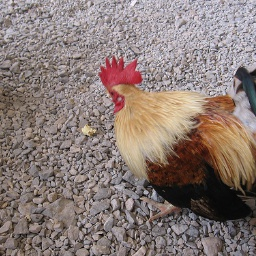

In [10]:
from IPython.display import Image
Image(filename = 'image_data//ILSVRC2012_val_00003606.jpeg',width= 300, height= 200)

In [11]:
processed_image = prepare_image('ILSVRC2012_val_00003606.jpeg')

In [12]:
processed_image.shape

(1, 224, 224, 3)

In [13]:
predictions = original_model.predict(processed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01514859', 'hen', 0.5734376),
  ('n01514668', 'cock', 0.42456666),
  ('n01807496', 'partridge', 0.00065948046),
  ('n02342885', 'hamster', 0.00016566401),
  ('n02364673', 'guinea_pig', 8.980193e-05)]]

In [14]:
import os
os.getcwd()

'D:\\001_Work_IESL\\001_Task@IESL\\2020\\0018_Image_Recognition_1stYear_by_Big_Data\\Tutorials_for_Image_Classification'

In [16]:
mobile1= tf.keras.applications.mobilenet.MobileNet()

In [17]:
mobile1.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [19]:
mobilev2 = tf.keras.applications.mobilenet_v2.MobileNetV2();

In [20]:
mobilev2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [21]:
predictions = mobilev2.predict(processed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01514668', 'cock', 0.95692945),
  ('n01514859', 'hen', 0.032631382),
  ('n01807496', 'partridge', 0.0003097788),
  ('n02437616', 'llama', 0.00014671635),
  ('n01616318', 'vulture', 0.00013141289)]]

In [34]:
mobilev2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

# Time Anaylsis comparsion 

# MobileNet v1

In [38]:
import time
kk=0;
for x in range(100):
    st = time.time()
    predictions = mobile1.predict(processed_image)
    #predictions = pruned_model.predict(final_image)
    #predictions = original_model.predict(final_image)
    endt= time.time() - st;
    #print(endt)
    kk=endt+kk;
   # results = imagenet_utils.decode_predictions(predictions)
   # print(results)

print('Average',kk/100)

Average 0.024285917282104493


# MobileNet V1 => Prunned

In [39]:
import time
kk=0;
for x in range(100):
    st = time.time()
    #predictions = mobile1.predict(processed_image)
    predictions = pruned_model.predict(processed_image)
    #predictions = original_model.predict(final_image)
    endt= time.time() - st;
    #print(endt)
    kk=endt+kk;
   # results = imagenet_utils.decode_predictions(predictions)
   # print(results)

print('Average',kk/100)

Average 0.024206466674804687


# MobileNet V2 

In [46]:
import time
kk=0;
for x in range(100):
    st = time.time()
    #predictions = mobile1.predict(processed_image)
    predictions = mobilev2.predict(processed_image)
    #predictions = original_model.predict(final_image)
    endt= time.time() - st;
    #print(endt)
    kk=endt+kk;
   # results = imagenet_utils.decode_predictions(predictions)
   # print(results)

print('Average',kk/100)

Average 0.033757805824279785
